In [275]:
import numpy as np
import matplotlib.pyplot as plt

In [276]:
# Load the data
data1 = np.loadtxt('P2024_f_eps_Part3.txt')
nat_freq = data1[:, 0]
damping_ratios = data1[:, 1]
modes = np.loadtxt('P2024_modes_Part3.txt')
# amp_mode1 = modes[:, 0]
# amp_mode2 = modes[:, 1]
# amp_mode3 = modes[:, 2]
# amp_mode4 = modes[:, 3]

data3 = np.loadtxt('P2024_frf_Part3_f_ds.txt')
frf_freq = data3[:, 0]
frf_re = data3[:, 1]
frf_im = data3[:, 2]

In [277]:
# Parameters
F0 = 450
Omega = 2*np.pi*50/(3.5*0.2)


def F_Z(t):
    return F0*np.sin(Omega*t)

<h1>Question 1 </h1> 
<h> Plot de l'excitation harmonique </h>



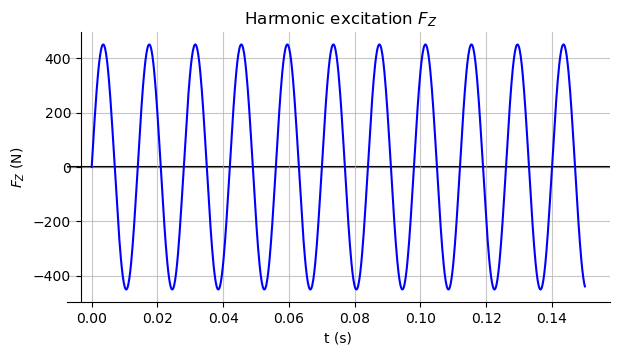

In [278]:
# Plot the harmonic excitation from 0 to 0.15s

t = np.linspace(0, 0.15, 1000)
F = F_Z(t)

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.plot(t, F, color='blue')
ax.axhline(y=0, color='black', zorder=0)

# Improve axes appearance
ax.spines['top'].set_visible(False)  # Remove top spine
ax.spines['right'].set_visible(False)  # Remove right spine
ax.spines['left'].set_position(('outward', -10))  # Offset left spine
ax.spines['bottom'].set_position(('outward', 0))  # Offset bottom spine

# Axes names
ax.set_xlabel('t (s)')
ax.set_ylabel('$F_Z$ (N)')

# Add grid with transparency
plt.grid(True, alpha=0.7)

# Add a title
plt.title(' Harmonic excitation $F_Z$')

# Show the plot
fig.savefig('Plots/harmonic_excitation.png', dpi=300, bbox_inches='tight')
plt.show()

<h1> Question 2 </h1>
<h> Calculer la matrice des FRF en accélération</h>

<h4> Construction de la matrice FRF et extraction de l'amplitude, partie réelle et imaginaire de la réponse du siège (capteur 12) à une excitation à la fourche (capteur 1) </h4>

In [ ]:
def FRF_matrix(freq):
    H = np.zeros((len(modes), len(modes)), dtype=complex)
    omega = 2*np.pi*freq
    nat_f = 2*np.pi*nat_freq

    for i in range(len(modes)):
        for j in range(len(modes)):
            for k in range(len(nat_f)):
                elem = (modes[i, k] * modes[j, k]) / (nat_f[k]**2 -
                                                      omega**2 + 2j * damping_ratios[k]*omega*nat_f[k])
                H[i, j] += elem
    return H


def Bode_amp_seat(freq):
    H = FRF_matrix(freq)
    amplitude = np.abs(H[11, 0])
    return amplitude


def nyq_real(freq):
    H = FRF_matrix(freq)
    return np.real(H[11, 0])


def nyq_im(freq):
    H = FRF_matrix(freq)
    return np.imag(H[11, 0])

Text(0, 0.5, 'Amplitude (dB)')

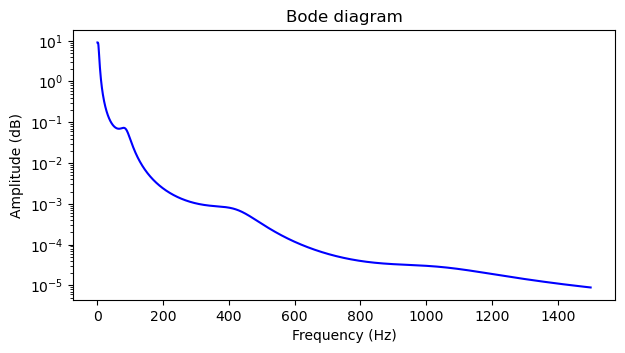

In [ ]:
# Bode diagram
frequencies = np.linspace(0, 1500, 2000)
amplitudes = [Bode_amp_seat(f) for f in frequencies]

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.semilogy(frequencies, amplitudes, color='blue')
plt.title('Bode diagram')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Amplitude (dB)')

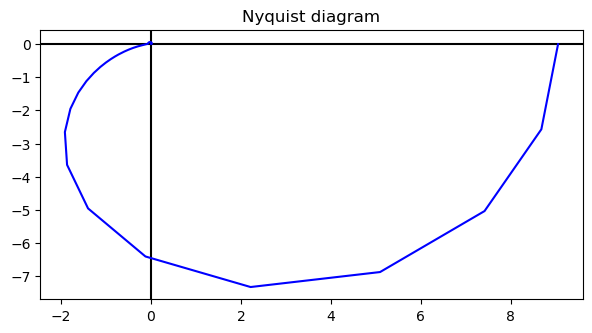

In [ ]:
# Nyquist diagram
nyquist_real = [nyq_real(f) for f in frequencies]
nyquist_im = [nyq_im(f) for f in frequencies]

fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.plot(nyquist_real, nyquist_im, color='blue')
plt.title('Nyquist diagram')
ax.axhline(y=0, color='black', zorder=0)
ax.axvline(x=0, color='black', zorder=0)

<h3> Bode and Nyquist diagrams from given FRF </h3>

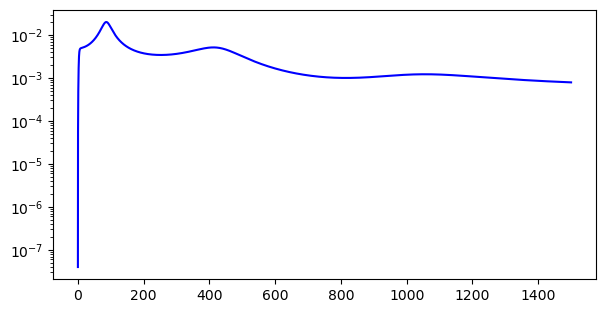

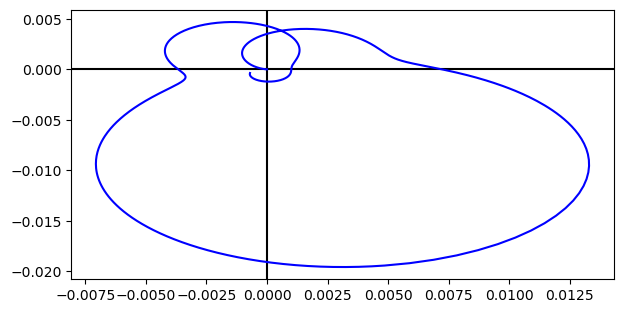

In [282]:
# Bode Plot of the gven FRF
fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
frf_amplitude = np.abs(frf_re + 1j*frf_im)
ax.semilogy(frf_freq[1:], frf_amplitude[1:], color='blue')

# nyquist plot of the given FRF
fig, ax = plt.subplots(figsize=(7, 4 * 7/8))
ax.plot(frf_re, frf_im, color='blue')
ax.axhline(y=0, color='black', zorder=0)
ax.axvline(x=0, color='black', zorder=0)